In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Different Techniques: 

1. Normalization and Standardization
2. Scaling to Minimum and Maximum values
3. Scaling to Mean and Quantiles (Robust Scaler)
4. Gaussian Transformation:
    - Logarithmic Transformation
    - Reciprocal Transformation
    - Square Root Transformation
    - Exponential Transformation
    - Box Cox Transformation

### 1. Standardization :
Bringing all features to a similar scale.
It means centering the variables/features at zero.

In [2]:
# using from sklearn module
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('train.csv', usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
# Filling missing values
df['Age'].fillna(df.Age.median(), inplace=True)

In [12]:
scaler = StandardScaler()
# just creating another dataframe for scaled value

df_scaled = scaler.fit_transform(df)

In [13]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


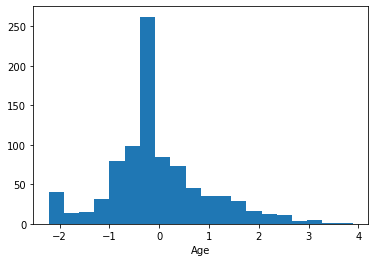

In [42]:
plt.hist(df_scaled.iloc[:, 2], bins=20)
plt.xlabel('Age');

### 2. MinMax Scaling:
Popularly used in CNNs. It scales the value between 0 and 1

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df = pd.read_csv('train.csv', usecols=['Pclass', 'Age', 'Fare', 'Survived'])

In [31]:
df_min_max = scaler.fit_transform(df)
df_min_max = pd.DataFrame(df_min_max, columns=df.columns)

In [32]:
df_min_max.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

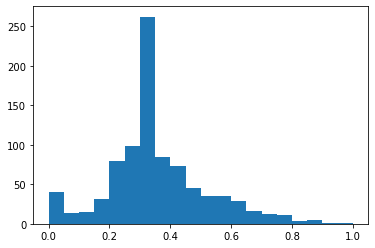

In [41]:
plt.hist(df_min_max['Age'], bins=20)

### 3. Robust Scaler :
It is used to scale the features to median and quantiles.

This scaling subtracts the median from all the observation and then dividing them by the Interquantile difference (difference between 75 percentile and 25 percentile).

IQR = 75 percentile - 25 percentile

X_scaled = (X - X_mean)/IQR


In [43]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [44]:
df = pd.read_csv('train.csv', usecols=['Pclass', 'Age', 'Fare', 'Survived'])

In [45]:
df_robust_scale = scaler.fit_transform(df)
df_robust_scale = pd.DataFrame(df_robust_scale, columns=df.columns)

In [46]:
df_robust_scale.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.335664,-0.312011
1,1.0,-2.0,0.559441,2.461242
2,1.0,0.0,-0.111888,-0.282777
3,1.0,-2.0,0.391608,1.673732
4,0.0,0.0,0.391608,-0.277363


(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([-1.54293706, -1.32033566, -1.09773427, -0.87513287, -0.65253147,
        -0.42993007, -0.20732867,  0.01527273,  0.23787413,  0.46047552,
         0.68307692,  0.90567832,  1.12827972,  1.35088112,  1.57348252,
         1.79608392,  2.01868531,  2.24128671,  2.46388811,  2.68648951,
         2.90909091]),
 <a list of 20 Patch objects>)

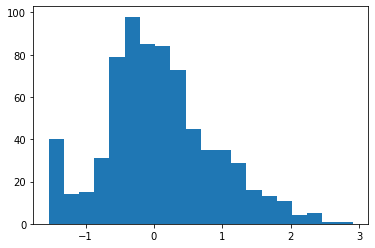

In [49]:
plt.hist(df_robust_scale['Age'], bins=20)

### 4. Gaussian Scaling: 
Some machine learning algorithms like linear regression and logistic regression assume that the features are normally/gaussian distributed.<br>
It increases accuracy and performance.<br>
- Logarithmic Transformation
- Reciprocal Transformation
- Square Root Transformation
- Exponential Transformation
- Box Cox Transformation


In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
# Handling missing values
df['Age'] = df['Age'].fillna(df.Age.median())

In [4]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [5]:
# To check whether data is Gaussian or Normal Distributed we use Q-Q Plot
import scipy.stats as stats

def plot_data(df, feature):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    ax[0].hist(df[feature], bins=20)
    
    stats.probplot(df[feature], dist='norm', plot=ax[1])

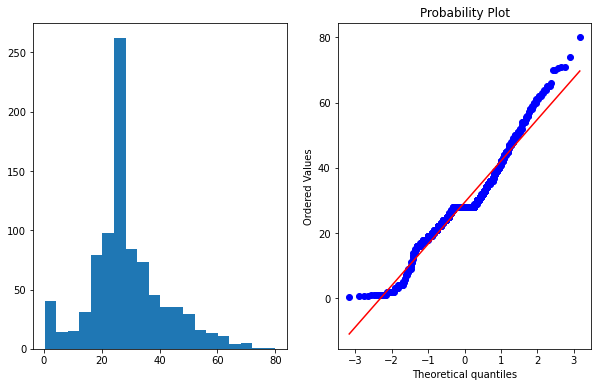

In [6]:
plot_data(df, 'Age')

# since the points in the ProbPlot are following the straight line we can say that the 'Age' is Normally Distributed.

### Logarithmic Transformation

In [8]:
df['Age_log'] = np.log(df['Age'])

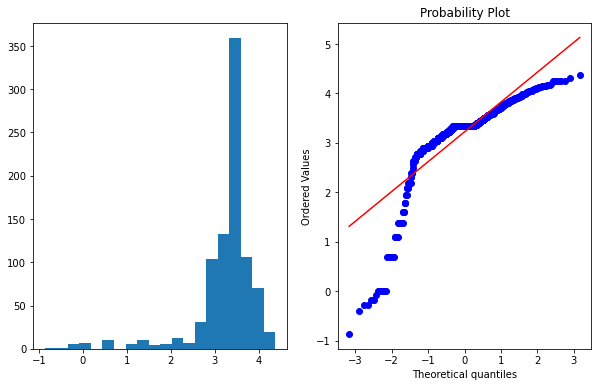

In [9]:
plot_data(df, 'Age_log')
# here after applying logarithmic transformation, we see that data does not follow Gaussian Distribution.

### Reciprocal Transformation

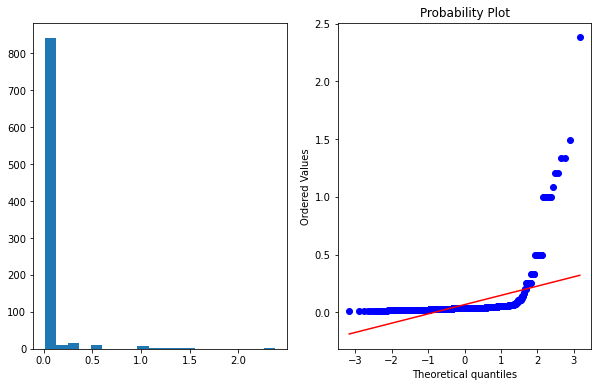

In [13]:
df['Age_rec'] = 1/df['Age']

plot_data(df, 'Age_rec')
# this is also not following Gaussian Distribution

### Sqaure Root Transformation

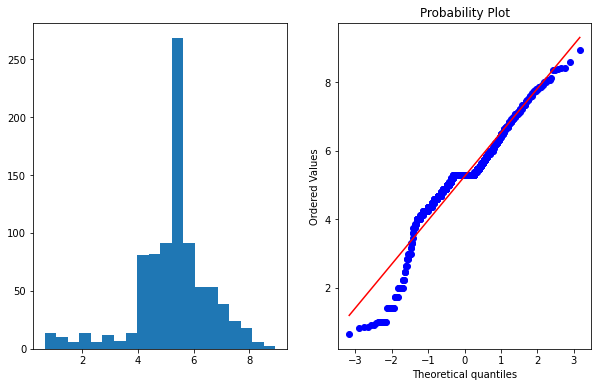

In [15]:
df['Age_sqrt'] = np.sqrt(df['Age'])

plot_data(df, 'Age_sqrt')
# This nearly follows Gaussian Distribution

### Exponential Transformation

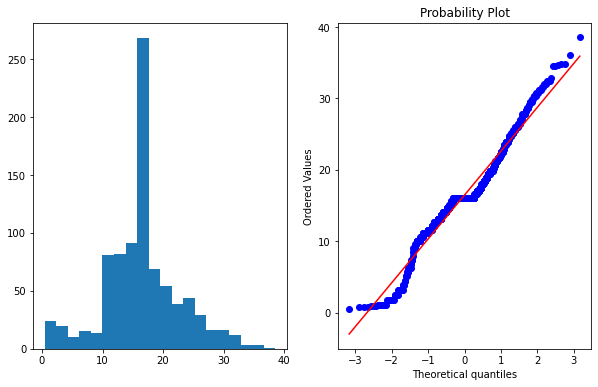

In [17]:
df['Age_exp'] = df['Age'] ** (1/1.2)

plot_data(df, 'Age_exp')
# This also nearly follows Gaussian Distribution

### Box Cox Transformation

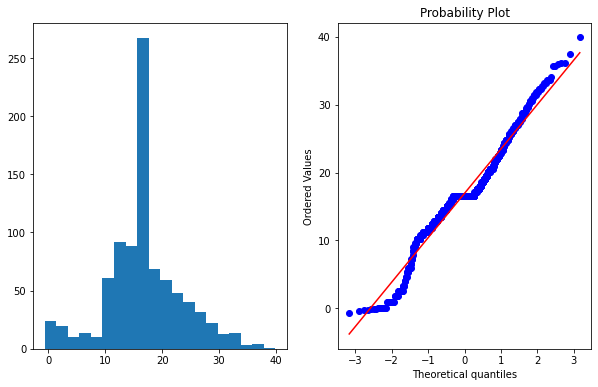

In [25]:
df['Age_boxcox'], parameter = stats.boxcox(df['Age'])

plot_data(df, "Age_boxcox")
# This also nearly follows Gaussian Distribution